## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

## Loading the data

In [2]:
df=pd.read_csv('bank_marketing_updated_v1.csv')
Attribute_details=pd.read_excel('Attribute details.xlsx')

In [3]:
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


first two rows are summary rows. so those are not required

In [4]:
bank=pd.read_csv('bank_marketing_updated_v1.csv', header=[2])
bank

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


## Understanding the data

In [5]:
bank.shape

(45211, 19)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

seems there are many objects -- need to convert those to numbers

age, month and response have null spaces -- need to impute/ remove missing values

In [7]:
bank.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


## Cleansing the data


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [9]:
# Fixing the duration column
# Function to convert duration to seconds

def convert_to_seconds(duration):
    if 'sec' in duration:
        return float(duration.split(' ')[0])
    elif 'min' in duration:
        return float(duration.split(' ')[0]) * 60
    else:
        return float(duration)

In [10]:
# Apply the function to the 'duration' column
bank['duration'] = bank['duration'].apply(convert_to_seconds)

# Convert the 'duration' column to float
bank['duration'] = bank['duration'].astype(float)

In [11]:
bank['duration'].dtype

dtype('float64')

In [12]:
bank.drop('customerid',axis=1,inplace=True)

In [13]:
# splitting jobedu column as job and edu
bank[['job','education']]= bank['jobedu'].str.split(",", expand=True)
bank = bank.drop(columns=bank[['jobedu']], errors='ignore')

In [14]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [15]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [16]:
# day is not useful for our study. so dropping that column
bank.drop('day',axis=1,inplace=True)

In [17]:
bank['month'].value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

All the data belong to the same year

In [18]:
bank['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

pdays column represents the no of days passed by since the customer has been reached by bank for any of the other products (not term deposit). The value ‘-1’ represents that the customer has never been reached for any product

As this -1 spoils my analysis,will replace this -1 as nan so that this wont come in my analysis

In [19]:
bank['pdays'][bank['pdays']==-1]=np.nan

In [20]:
bank['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [21]:
bank.isnull().sum()

age             20
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
month           50
duration         0
campaign         0
pdays        36954
previous         0
poutcome         0
response        30
job              0
education        0
dtype: int64

In [22]:
(bank.isnull().sum()/len(bank))*100

age           0.044237
salary        0.000000
balance       0.000000
marital       0.000000
targeted      0.000000
default       0.000000
housing       0.000000
loan          0.000000
contact       0.000000
month         0.110593
duration      0.000000
campaign      0.000000
pdays        81.736745
previous      0.000000
poutcome      0.000000
response      0.066356
job           0.000000
education     0.000000
dtype: float64

In [23]:
bank['age'].fillna(bank['age'].mean(),inplace=True)

In [24]:
bank['month'].fillna('may',inplace=True)

In [25]:
bank=bank[~bank['response'].isnull()]

In [26]:
bank

,age,salary,balance,marital,targeted,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,"may, 2017",261.0,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,"may, 2017",151.0,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,"may, 2017",76.0,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,"may, 2017",92.0,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,"may, 2017",198.0,1,NaN,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,"nov, 2017",977.0,3,NaN,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,"nov, 2017",456.0,2,NaN,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,"nov, 2017",1127.0,5,184.0,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,"nov, 2017",508.0,4,NaN,0,unknown,no,blue-collar,secondary


## Outliers

In [27]:
bank.describe(percentiles=[0.25,0.5,0.75,0.99])

,age,salary,balance,duration,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,8251.000000,45181.000000
mean,40.935763,57005.046369,1362.689936,258.147717,2.763352,224.596170,0.580355
std,10.616439,32089.163369,3045.584521,257.551174,3.096578,115.352191,2.303987
min,18.000000,0.000000,-8019.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,20000.000000,72.000000,103.000000,1.000000,133.000000,0.000000
50%,39.000000,60000.000000,448.000000,180.000000,2.000000,195.000000,0.000000
75%,48.000000,70000.000000,1428.000000,319.000000,3.000000,327.000000,0.000000
99%,71.000000,120000.000000,13169.200000,1269.400000,16.000000,531.500000,9.000000
max,95.000000,120000.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: >

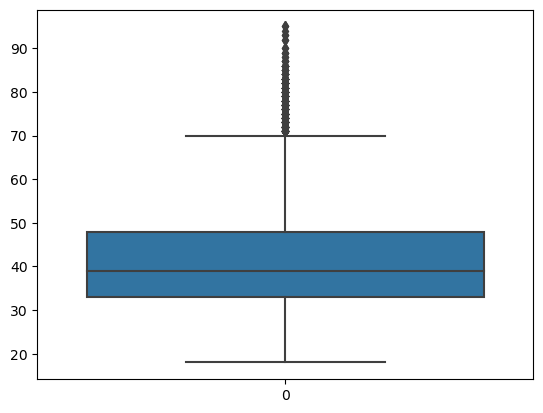

In [28]:
sns.boxplot(bank['age'])

In [29]:
bank['age'][bank['age']>70].count()

487

only 480+ people are more than 70+ age seems age feature dont have any oulier

<Axes: >

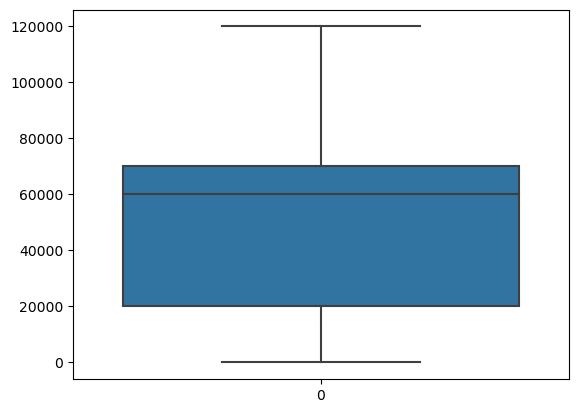

In [30]:
sns.boxplot(bank['salary'])

<Axes: >

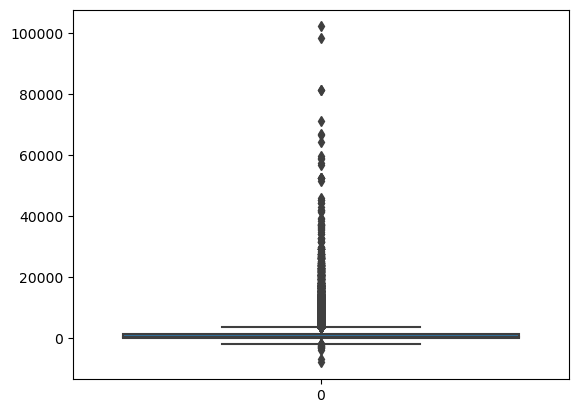

In [31]:
sns.boxplot(bank['balance'])

1) For balance there are some negative values and in banking sector negative balance doesn't seem to be erroneous

2) and there is a big difference between mean(1362) and median (448)

3) 75% to max and even 99% to max also having huge jump.

seems to have some outliers in this feature

# Univariate analysis

In [32]:
bank.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,"may, 2017",261.0,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,"may, 2017",151.0,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,"may, 2017",76.0,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,"may, 2017",92.0,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,"may, 2017",198.0,1,NaN,0,unknown,no,unknown,unknown


In [33]:
bank['marital'].value_counts(normalize=True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

KeyError: 'marital'

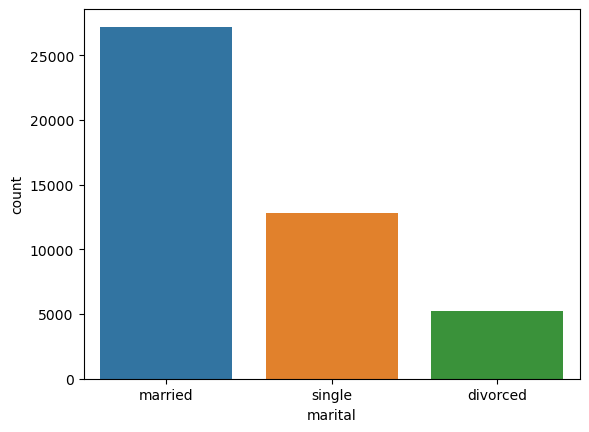

In [37]:
sns.countplot(x='marital', data= bank)
for i,v in enumerate(df['marital'].value_counts()):
    plt.text(i-.15,v-1100,str(v))

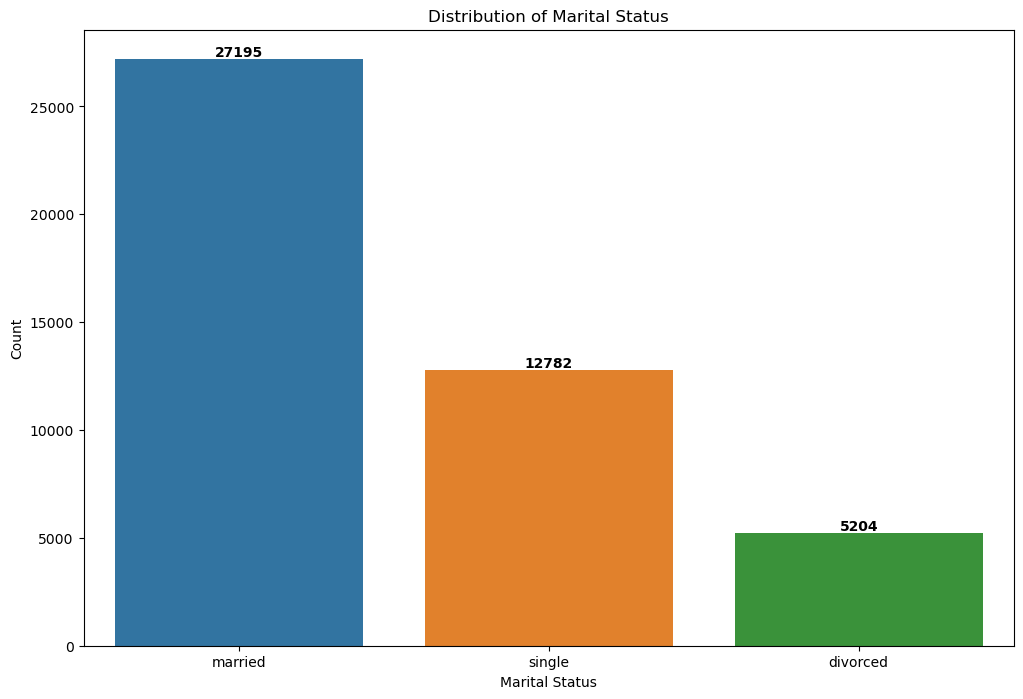

In [38]:
plt.figure(figsize=(12, 8), dpi=100)
ax=sns.countplot(x='marital', data=bank)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
for i, v in enumerate(bank['marital'].value_counts()):
    ax.text(i, v + 3, str(v), ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

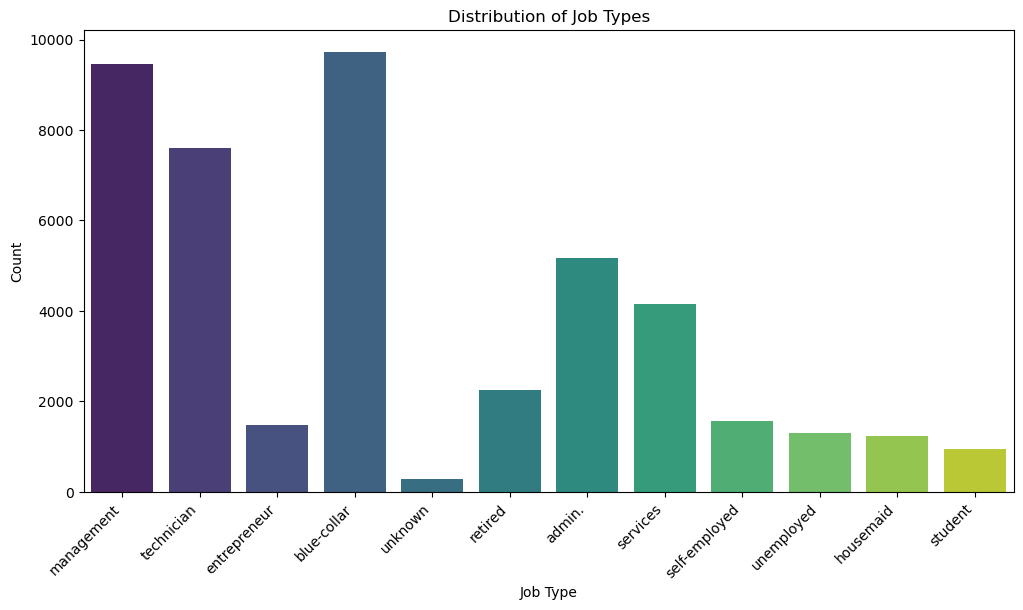

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=bank, palette='viridis')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='education', ylabel='count'>

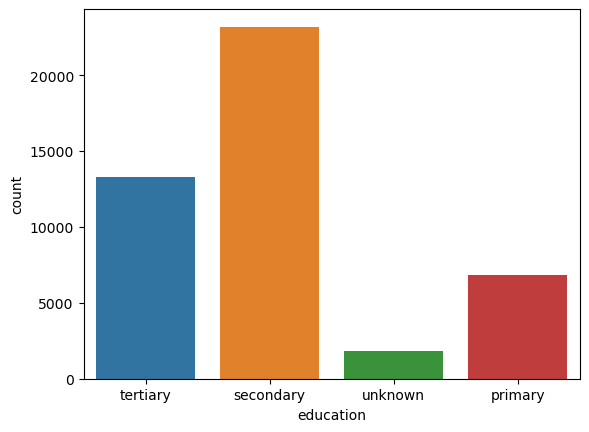

In [40]:
sns.countplot(x='education', data=bank)

<Axes: xlabel='poutcome', ylabel='count'>

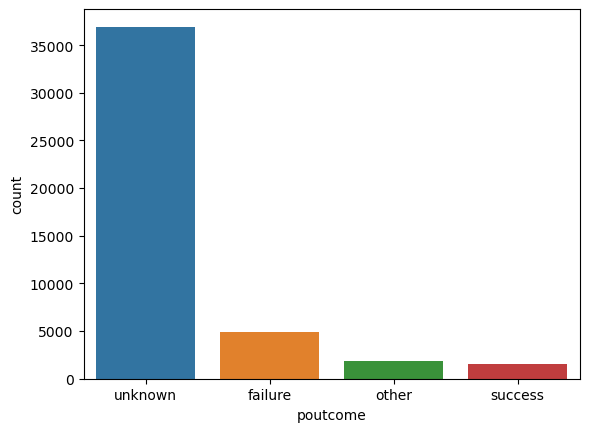

In [41]:
sns.countplot(x='poutcome', data=bank)

<Axes: >

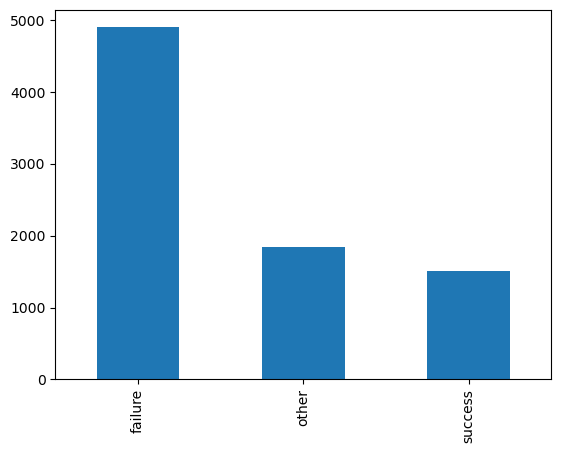

In [42]:
# removing unknown and plotting again
bank['poutcome'][~(bank['poutcome']=='unknown')].value_counts().plot.bar()

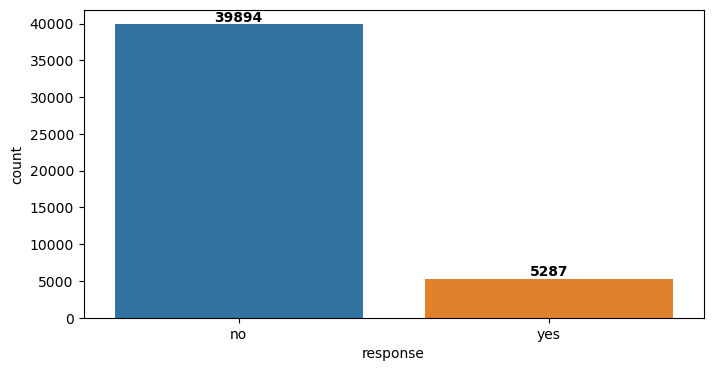

In [43]:
plt.figure(figsize=(8, 4), dpi=100)
ax=sns.countplot(x='response', data=bank)
for i, v in enumerate(bank['response'].value_counts()):
    ax.text(i, v + 3, str(v), ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

## Bivariate Analysis

<Axes: xlabel='age', ylabel='balance'>

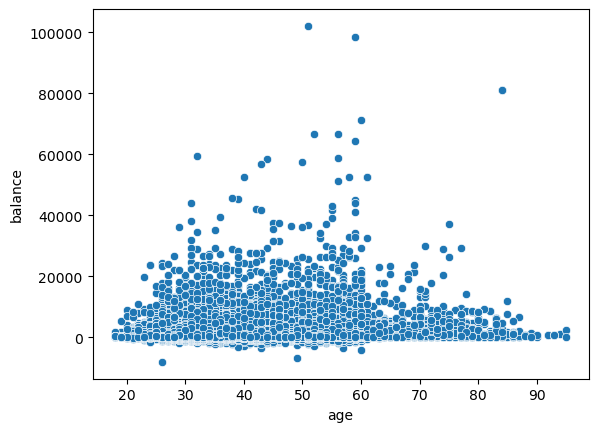

In [44]:
sns.scatterplot(x='age', y='balance', data=bank)

<Axes: xlabel='salary', ylabel='balance'>

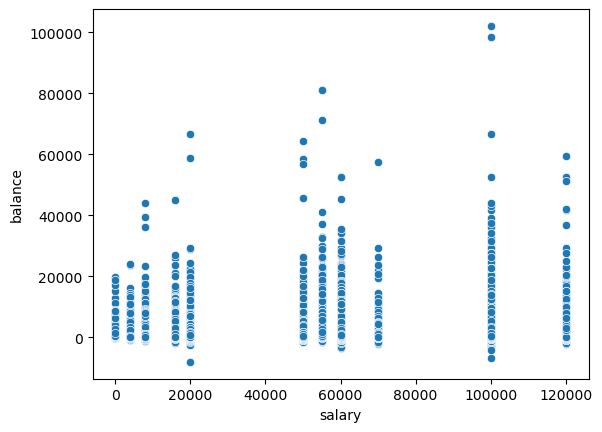

In [45]:
sns.scatterplot(x='salary', y='balance', data=bank)

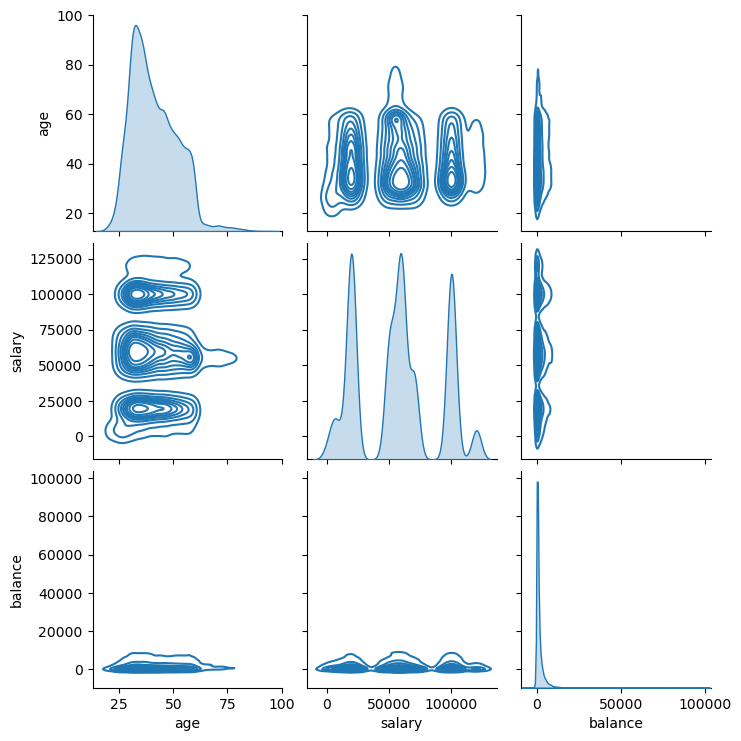

In [48]:
sns.pairplot(bank[['age','salary','balance']],kind='kde')

<Axes: >

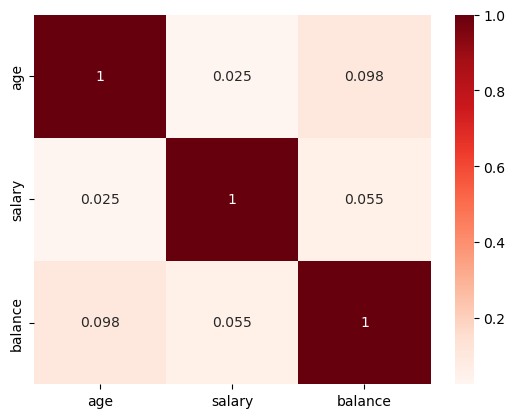

In [47]:
sns.heatmap(bank[['age','salary','balance']].corr(),annot=True,cmap='Reds')

In [49]:
response_group=bank.groupby('response')
response_group['salary'].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

In [50]:
response_group['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

<Axes: xlabel='response', ylabel='salary'>

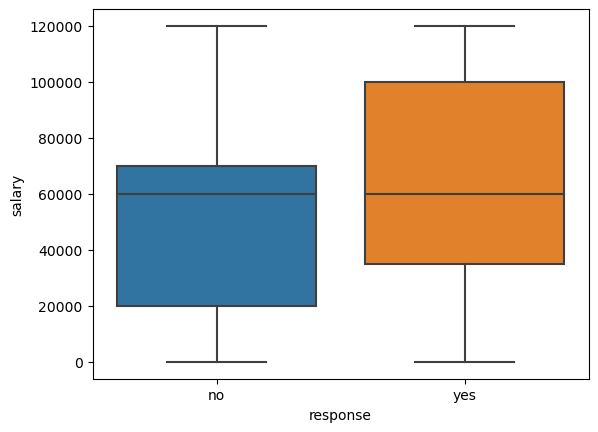

In [51]:
sns.boxplot(x='response',y='salary', data=bank)

In [52]:
response_group['balance'].mean()

response
no     1304.094525
yes    1804.832041
Name: balance, dtype: float64

In [53]:
response_group['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

<Axes: xlabel='response', ylabel='balance'>

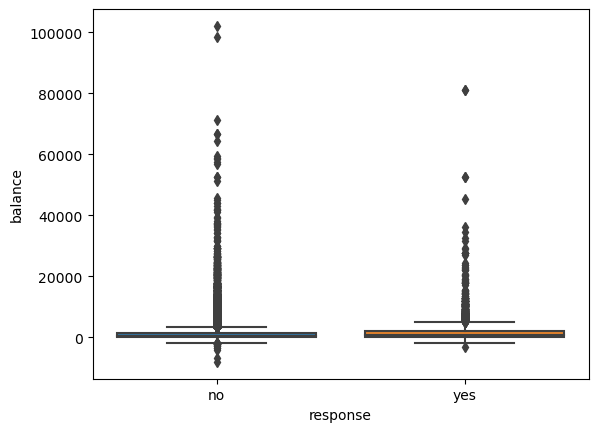

In [54]:
sns.boxplot(x='response',y='balance', data= bank)

In [55]:
bank.groupby('response')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
response,,,,,,,,
no,39894.0,1304.094525,2975.033811,-8019.0,58.0,417.0,1345.0,102127.0
yes,5287.0,1804.832041,3501.645424,-3058.0,210.5,733.0,2159.5,81204.0


In [56]:
bank.groupby('education')['salary'].aggregate(['mean','median'])

,mean,median
education,,
primary,34220.192870,20000.0
secondary,49739.143559,55000.0
tertiary,82875.564249,100000.0
unknown,46529.633621,50000.0


In [57]:
bank.groupby('job')['salary'].mean().sort_values()

job
unknown               0.0
student            4000.0
unemployed         8000.0
housemaid         16000.0
blue-collar       20000.0
admin.            50000.0
retired           55000.0
self-employed     60000.0
technician        60000.0
services          70000.0
management       100000.0
entrepreneur     120000.0
Name: salary, dtype: float64

In [58]:
bank['response_flag']=bank['response'].replace({'no':0,'yes':1})

In [59]:
bank.groupby('education')['response_flag'].mean()

education
primary      0.086353
secondary    0.105610
tertiary     0.150090
unknown      0.135776
Name: response_flag, dtype: float64

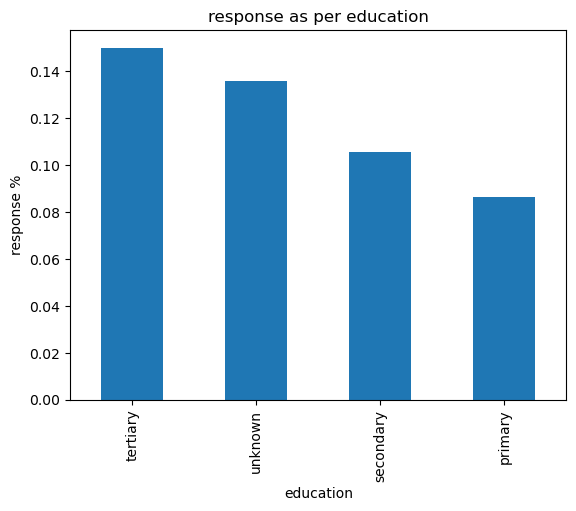

In [60]:
bank.groupby('education')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per education')
plt.ylabel('response %')
plt.show()

In [61]:
bank.groupby('marital')['response_flag'].mean()

marital
divorced    0.119523
married     0.101269
single      0.149507
Name: response_flag, dtype: float64

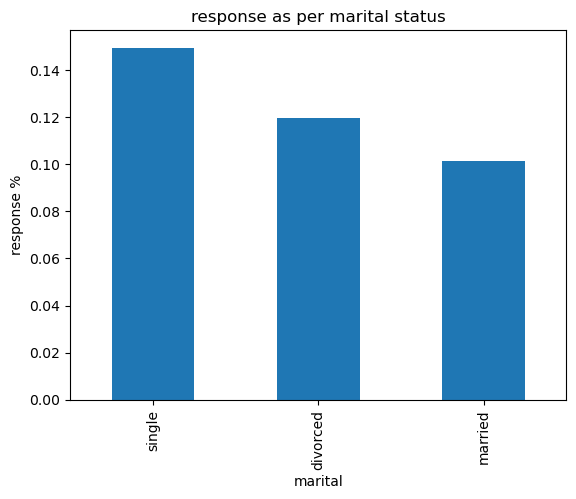

In [62]:
bank.groupby('marital')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per marital status')
plt.ylabel('response %')
plt.show()

In [63]:
bank.groupby('loan')['response_flag'].mean()

loan
no     0.126585
yes    0.066869
Name: response_flag, dtype: float64

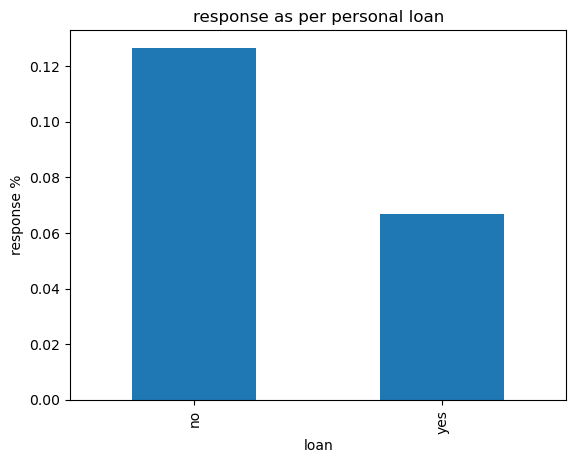

In [64]:
bank.groupby('loan')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per personal loan')
plt.ylabel('response %')
plt.show()

In [65]:
bank.groupby('housing')['response_flag'].mean()

housing
no     0.167074
yes    0.077015
Name: response_flag, dtype: float64

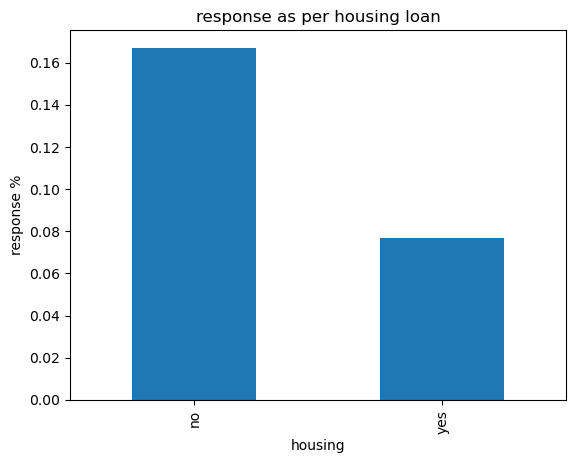

In [66]:
bank.groupby('housing')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per housing loan')
plt.ylabel('response %')
plt.show()

<Axes: xlabel='response', ylabel='age'>

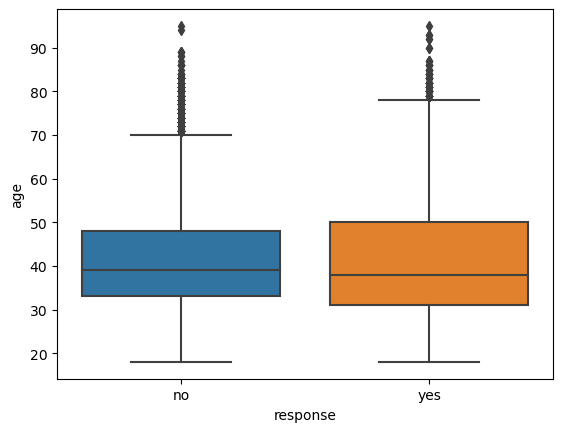

In [67]:
sns.boxplot(x='response', y='age', data=bank)

In [68]:
bank.groupby(['response'])['age'].mean()

response
no     40.838869
yes    41.666895
Name: age, dtype: float64

In [69]:
bank.groupby(['response'])['age'].median()

response
no     39.0
yes    38.0
Name: age, dtype: float64

In [70]:
bank['age_bucket']=pd.cut(bank['age'],bins=[0,30,40,50,60,70,100],labels=['0-30','31-40','41-50','51-60','61-70','70+'])

In [71]:
bank.groupby('age_bucket')['response_flag'].mean()

age_bucket
0-30     0.162847
31-40    0.102537
41-50    0.090747
51-60    0.100410
61-70    0.406295
70+      0.447639
Name: response_flag, dtype: float64

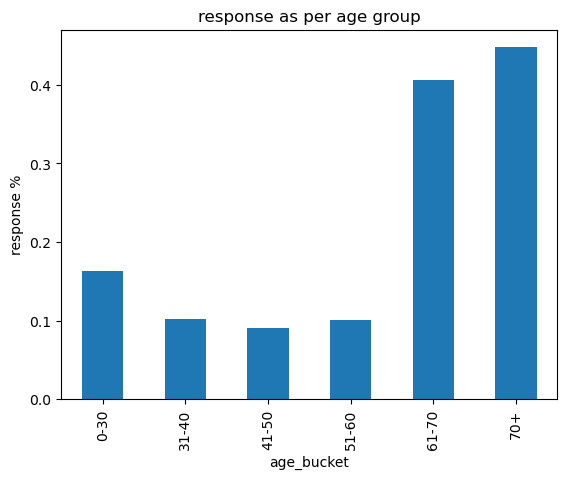

In [72]:
bank.groupby('age_bucket')['response_flag'].mean().plot.bar()
plt.title('response as per age group')
plt.ylabel('response %')
plt.show()

## Multivariate analysis

In [73]:
edu_vs_marital=pd.pivot_table(data=bank,index='education',columns='marital',values='response_flag')
edu_vs_marital

marital,divorced,married,single
education,,,
primary,0.138482,0.075573,0.106682
secondary,0.103448,0.094681,0.129271
tertiary,0.138001,0.129798,0.183622
unknown,0.142012,0.122519,0.162879


<Axes: xlabel='marital', ylabel='education'>

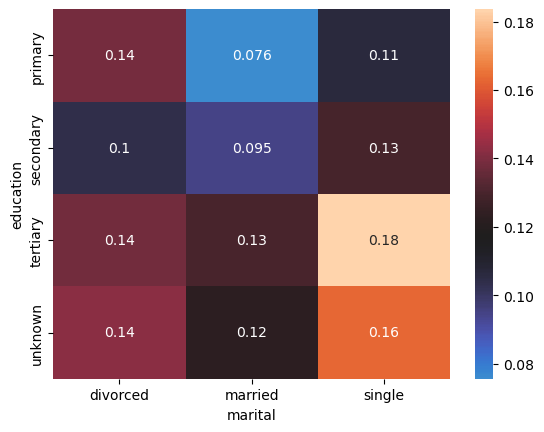

In [74]:
sns.heatmap(edu_vs_marital,annot=True,center=bank['response_flag'].mean())

In [75]:
job_vs_marital=pd.pivot_table(data=bank,index='job',columns='marital',values='response_flag')
job_vs_marital

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136074
blue-collar,0.077437,0.062751,0.105760
entrepreneur,0.083799,0.075701,0.113924
housemaid,0.097826,0.073546,0.166667
management,0.127813,0.126205,0.162199
retired,0.285377,0.220682,0.120370
self-employed,0.157143,0.079637,0.191874
services,0.091075,0.074074,0.117696
student,0.166667,0.185185,0.293850


<Axes: xlabel='marital', ylabel='job'>

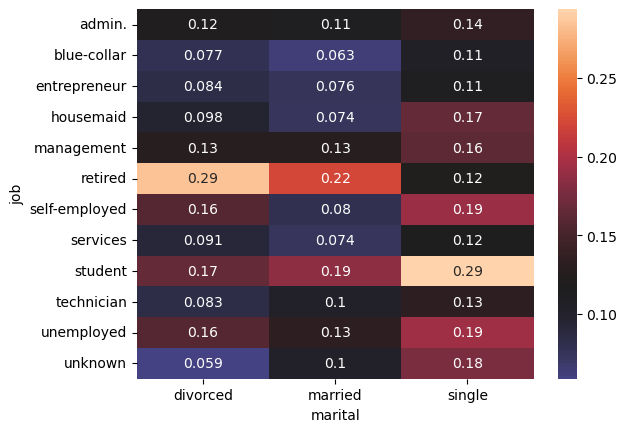

In [76]:
sns.heatmap(job_vs_marital,annot=True,center=bank['response_flag'].mean())